<a href="https://colab.research.google.com/github/OM-TRIPATHI1513/Brain_Tumor_Detection_Datasets/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.7698 - loss: 0.4902 - val_accuracy: 0.7839 - val_loss: 0.4308
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.8244 - loss: 0.3647 - val_accuracy: 0.8724 - val_loss: 0.3599
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.8738 - loss: 0.2932 - val_accuracy: 0.8724 - val_loss: 0.3232
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9029 - loss: 0.2441 - val_accuracy: 0.8932 - val_loss: 0.2824
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9264 - loss: 0.1994 - val_accuracy: 0.8802 - val_loss: 0.2954
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9365 - loss: 0.1598 - val_accuracy: 0.9193 - val_loss: 0.2110
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9503 - loss: 0.1288 - val_accuracy: 0.9193 - val_loss: 0.1944
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.9624 - loss: 0.0999 - val_accuracy: 0.9167

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_50 (Activation)           │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_51 (Activation)           │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_52 (Activation)           │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_53 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_54 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,872 (2.02 MB)

 Trainable params: 176,290 (688.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 352,582 (1.34 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
The probability of tumor presence is: 0.05%
Tumor presence: No

Test accuracy: 0.9609
Test loss: 0.1032
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


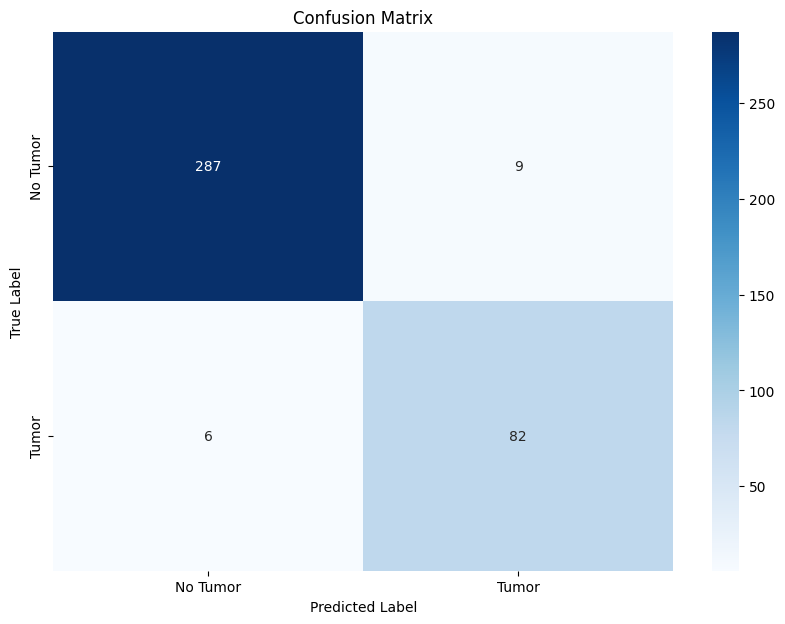


Classification Report:
              precision    recall  f1-score   support

    No Tumor       0.98      0.97      0.97       296
       Tumor       0.90      0.93      0.92        88

    accuracy                           0.96       384
   macro avg       0.94      0.95      0.95       384
weighted avg       0.96      0.96      0.96       384



In [33]:
def train_model():
    image_directory = 'datasets/'
    no_tumor_images = os.listdir(image_directory + 'no/')
    yes_tumor_images = os.listdir(image_directory + 'yes/')
    dataset = []
    label = []

    INPUT_SIZE = 64

    for image_name in no_tumor_images:
        if image_name.split('.')[1] == 'jpg':
            image = cv2.imread(image_directory + 'no/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((INPUT_SIZE, INPUT_SIZE))
            dataset.append(np.array(image))
            label.append(0)

    for image_name in yes_tumor_images:
        if image_name.split('.')[1] == 'jpg':
            image = cv2.imread(image_directory + 'yes/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((INPUT_SIZE, INPUT_SIZE))
            dataset.append(np.array(image))
            label.append(1)

    dataset = np.array(dataset)
    label = np.array(label)

    x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

    x_train = normalize(x_train, axis=1)
    x_test = normalize(x_test, axis=1)

    y_train = to_categorical(y_train, num_classes=2)
    y_test = to_categorical(y_test, num_classes=2)

    model = Sequential()

    model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=16,
                        verbose=1,
                        epochs=10,
                        validation_data=(x_test, y_test),
                        shuffle=False)

    # Save the model
    model.save('my_model.keras')

    # Save training data
    with open('x_train.pkl', 'wb') as f:
        pickle.dump(x_train, f)
    with open('y_train.pkl', 'wb') as f:
        pickle.dump(y_train, f)
    with open('x_test.pkl', 'wb') as f:
        pickle.dump(x_test, f)
    with open('y_test.pkl', 'wb') as f:
        pickle.dump(y_test, f)

    return model, history, x_train, y_train, x_test, y_test

def test_model(model, x_train, y_train, x_test, y_test):
    # Read and preprocess the image
    image_path = 'pred//pred2.jpg'
    image = cv2.imread(image_path)
    img = Image.fromarray(image)
    img = img.resize((64, 64))
    img = np.array(img)

    # Preprocess the image - assuming normalization to [0, 1] during training
    input_img = img.astype('float32') / 255.0
    input_img = np.expand_dims(input_img, axis=0)

    # Make predictions
    predictions = model.predict(input_img)
    tumor_probability = predictions[0][1] * 100  # Probability of tumor presence

    # Determine the binary classification based on a threshold
    threshold = 50  # Adjust the threshold as needed
    binary_result = "Yes" if tumor_probability >= threshold else "No"

    # Print the percentage of efficiency and binary classification
    print(f"The probability of tumor presence is: {tumor_probability:.2f}%")
    print(f"Tumor presence: {binary_result}")

    # Evaluate model on test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"\nTest accuracy: {test_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}")

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Train the model and get the results
    model, history, x_train, y_train, x_test, y_test = train_model()

    # Create accuracy table
    accuracy_table = pd.DataFrame({
        'Epoch': range(1, len(history.history['accuracy']) + 1),
        'Training Accuracy': history.history['accuracy'],
        'Validation Accuracy': history.history['val_accuracy']
    })

    print("\nAccuracy Table:")
    print(accuracy_table.to_string(index=False))

    # Print final training accuracy
    final_train_accuracy = history.history['accuracy'][-1]
    print(f"\nFinal Training Accuracy: {final_train_accuracy:.4f}")

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Print model summary
    model.summary()

    # Test the model on a specific image
    test_model(model, x_train, y_train, x_test, y_test)

    # Generate predictions for confusion matrix
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred_classes, classes=['No Tumor', 'Tumor'])

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=['No Tumor', 'Tumor']))


